In [ ]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

from NVcenter import *
plt.style.use('NVcenter-default')

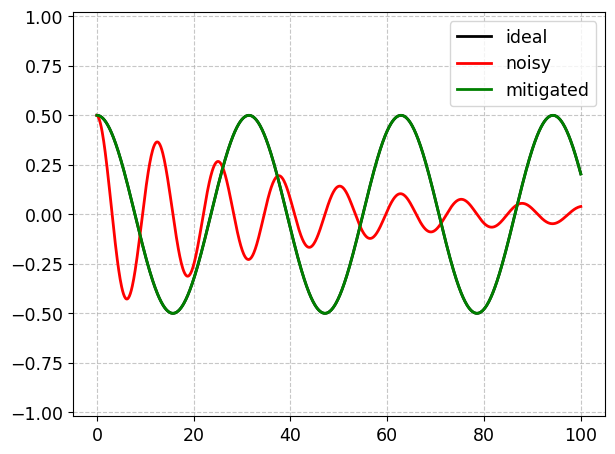

In [125]:
# error mitigation of a combined relaxation and pure dephasing channel with unitary dynamics 
T1 = 100
T2_star = 50
T2 = (1/(2*T1) + 1/T2_star)**(-1)
timesteps = 1000

H_ideal = 0.5 * 0.2 * q.sigmaz()
omega_noise = 0.3
H_noisy = 0.5 * omega_noise * q.sigmaz()
H = H_ideal + H_noisy
rho0 = 0.5 * ( q.ket2dm(q.basis(2,0) + q.basis(2,1)) )
t_list = np.linspace(0, 100, timesteps)
c_ops = [np.sqrt(1/T1) * q.sigmap(), np.sqrt(1/(2*T2_star)) * q.sigmaz()]

rho_list_noisy = q.mesolve(H, rho0, t_list, c_ops).states
rho_list_ideal = q.mesolve(H_ideal, rho0, t_list, []).states

rho_list_mitigated = []
for i in range(timesteps):

    rho_noisy = rho_list_noisy[i]
    t = t_list[i]
    theta = np.arccos(np.exp(-t/(2*T1)))
    
    p1 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) + 1)
    p2 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) - 1)
    p3 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) + 1)
    p4 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) - 1)
    p5 = np.exp(t/T1) - 1

    U_noise = (-1j*H_noisy*t).expm() # q.gates.rz(omega_noise * t) 
    U1 = q.gates.rz(-theta)
    U2 = U1 * q.sigmaz()
    U3 = q.gates.rz(theta)
    U4 = U3 * q.sigmaz()
    a = rho_noisy[0,0] + rho_noisy[1,1]
    
    rho_mitigated = (p1 * U1 * rho_noisy * U1.dag() 
                     - p2 * U2 * rho_noisy * U2.dag() 
                     + p3 * U3 * rho_noisy * U3.dag() 
                     - p4 * U4 * rho_noisy * U4.dag() 
                     - p5 * q.Qobj([[a,0], [0,0]])
                    )
    rho_mitigated = U_noise.dag() * rho_mitigated * U_noise
    rho_list_mitigated.append(rho_mitigated)

plt.plot(t_list, [dm[0,1].real for dm in rho_list_ideal], 'k', label='ideal')
plt.plot(t_list, [dm[0,1].real for dm in rho_list_noisy], 'r', label='noisy')
plt.plot(t_list, [dm[0,1].real for dm in rho_list_mitigated], 'g', label='mitigated')
plt.ylim(-1.02, 1.02)
plt.legend()
plt.show()

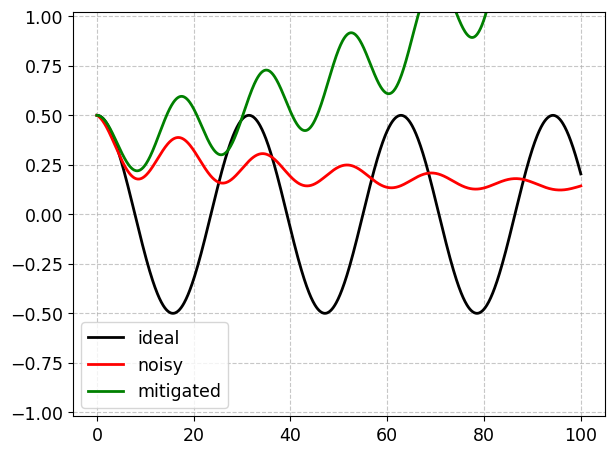

In [124]:
# error mitigation of a combined relaxation and pure dephasing channel with unitary dynamics 
T1 = 100
T2_star = 50
T2 = (1/(2*T1) + 1/T2_star)**(-1)
timesteps = 1000

H_ideal = 0.5 * 0.2 * q.sigmaz()
omega_noise = 0.3
H_noisy = 0.5 * omega_noise * q.sigmax()
H = H_ideal + H_noisy
rho0 = 0.5 * ( q.ket2dm(q.basis(2,0) + q.basis(2,1)) )
t_list = np.linspace(0, 100, timesteps)
c_ops = [np.sqrt(1/T1) * q.sigmap(), np.sqrt(1/(2*T2_star)) * q.sigmaz()]

rho_list_noisy = q.mesolve(H, rho0, t_list, c_ops).states
rho_list_ideal = q.mesolve(H_ideal, rho0, t_list, []).states

rho_list_mitigated = []
for i in range(timesteps):

    rho_noisy = rho_list_noisy[i]
    t = t_list[i]
    theta = np.arccos(np.exp(-t/(2*T1)))
    
    p1 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) + 1)
    p2 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) - 1)
    p3 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) + 1)
    p4 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) - 1)
    p5 = np.exp(t/T1) - 1

    U_noise = (-1j*H_noisy*t).expm() # q.gates.rz(omega_noise * t) 
    U1 = q.gates.rz(-theta)
    U2 = U1 * q.sigmaz()
    U3 = q.gates.rz(theta)
    U4 = U3 * q.sigmaz()
    a = rho_noisy[0,0] + rho_noisy[1,1]
    
    rho_mitigated = (p1 * U1 * rho_noisy * U1.dag() 
                     - p2 * U2 * rho_noisy * U2.dag() 
                     + p3 * U3 * rho_noisy * U3.dag() 
                     - p4 * U4 * rho_noisy * U4.dag() 
                     - p5 * q.Qobj([[a,0], [0,0]])
                    )
    rho_mitigated = U_noise.dag() * rho_mitigated * U_noise
    rho_list_mitigated.append(rho_mitigated)

plt.plot(t_list, [dm[0,1].real for dm in rho_list_ideal], 'k', label='ideal')
plt.plot(t_list, [dm[0,1].real for dm in rho_list_noisy], 'r', label='noisy')
plt.plot(t_list, [dm[0,1].real for dm in rho_list_mitigated], 'g', label='mitigated')
plt.ylim(-1.02, 1.02)
plt.legend()
plt.show()

In [ ]:
# ac magnetic field sensing